In [1]:
from itertools import combinations, groupby
import networkx as nx
import random
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

In [2]:

def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        w = random.randrange(1, 7, 1)
        G.add_edge(*random_edge,  weight=w)
        w = 0
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G


nodes = 10 #random.randint(5,10)
seed = random.randint(1,10)
probability = 0.15
G = gnp_random_connected_graph(nodes,probability)
n = G.number_of_nodes()
alp = list(map(chr, range(ord('A'), ord('Z')+1)))
maprelab = {x: y for x, y in zip(range(n), alp)}
G = nx.relabel_nodes(G, maprelab, copy=True)
A = nx.adjacency_matrix(G)
A = A.toarray()
vxnames = []
adj_matrix = np.array(A)
for i in range(n):
    vxnames.append(alp[i])
adj_matrix = np.reshape(adj_matrix, (n,n))
vxnames_col = np.reshape(vxnames, (n, -1))
vxnames = np.array(vxnames)
vxnames = np.append(np.nan, vxnames)
vxnames = np.reshape(vxnames, (-1, n + 1))
adj_matrix_print = np.append(vxnames_col, adj_matrix, axis=1)
adj_matrix_print = np.append(vxnames, adj_matrix_print, axis=0)
print(adj_matrix_print)

[['nan' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
 ['A' '0' '0' '0' '0' '0' '0' '4' '0' '0' '0']
 ['B' '0' '0' '1' '0' '0' '0' '0' '0' '0' '2']
 ['C' '0' '1' '0' '0' '0' '0' '0' '3' '0' '0']
 ['D' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0']
 ['E' '0' '0' '0' '0' '0' '0' '0' '1' '6' '0']
 ['F' '0' '0' '0' '0' '0' '0' '1' '0' '5' '0']
 ['G' '4' '0' '0' '0' '0' '1' '0' '0' '0' '3']
 ['H' '0' '0' '3' '0' '1' '0' '0' '0' '0' '4']
 ['I' '0' '0' '0' '1' '6' '5' '0' '0' '0' '4']
 ['J' '0' '2' '0' '0' '0' '0' '3' '4' '4' '0']]


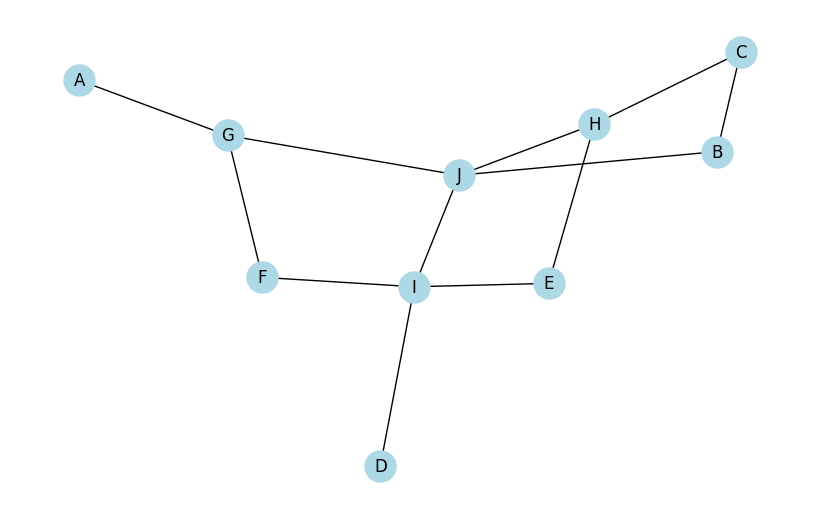

In [3]:
plt.figure(figsize=(8,5))
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [4]:
import pandas as pd 
#pd.DataFrame(data=data[1:,1:],    # values
#...              index=data[1:,0],    # 1st column as index
#...              columns=data[0,1:]) 
DF = pd.DataFrame(adj_matrix_print[1:,1:],
                  index=adj_matrix_print[1:,0],
                  columns=adj_matrix_print[0,1:]) 
DF.to_csv("adj_matrix.csv")